<a href="https://colab.research.google.com/github/Donein/ML-Classification-mobile-price-prediction-/blob/main/Mobile_Price_Range_Prediction.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# In the competitive mobile phone market companies want to understand sales data of mobile phones and factors which drive the prices. The objective is to find out some relation between features of a mobile phone(eg:- RAM, Internal Memory, etc) and its selling price. In this problem, we do not have to predict the actual price but a price range indicating how high the price is.

# Description:-

# Battery_power - Total energy a battery can store in one time measured in mAh
# Blue - Has bluetooth or not
# Clock_speed - speed at which microprocessor executes instructions *italicized text*
Dual_sim - Has dual sim support or not
Fc - Front Camera mega pixels
Four_g - Has 4G or not
Int_memory - Internal Memory in Gigabytes
M_dep - Mobile Depth in cm
Mobile_wt - Weight of mobile phone
N_cores - Number of cores of processor
Pc - Primary Camera mega pixels
Px_height - Pixel Resolution Height
Px_width - Pixel Resolution Width
Ram - Random Access Memory in Mega
Touch_screen - Has touch screen or not
Wifi - Has wifi or not
Sc_h - Screen Height of mobile in cm
Sc_w - Screen Width of mobile in cm
Talk_time - longest time that a single battery charge will last when you are
Three_g - Has 3G or not
Wifi - Has wifi or not
Price_range - This is the target variable with value of 0(low cost), 1(medium cost),

*   List item
*   List item



In [ ]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import math
import seaborn as sns
from sklearn.ensemble import RandomForestClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.pipeline import make_pipeline
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import cross_val_score
from sklearn.model_selection import GridSearchCV


In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [ ]:
data = pd.read_csv('/content/drive/MyDrive/Data_mobile_price_range.csv')
data.head()

,battery_power,blue,clock_speed,dual_sim,fc,four_g,int_memory,m_dep,mobile_wt,n_cores,...,px_height,px_width,ram,sc_h,sc_w,talk_time,three_g,touch_screen,wifi,price_range
0,842,0,2.2,0,1,0,7,0.6,188,2,...,20,756,2549,9,7,19,0,0,1,1
1,1021,1,0.5,1,0,1,53,0.7,136,3,...,905,1988,2631,17,3,7,1,1,0,2
2,563,1,0.5,1,2,1,41,0.9,145,5,...,1263,1716,2603,11,2,9,1,1,0,2
3,615,1,2.5,0,0,0,10,0.8,131,6,...,1216,1786,2769,16,8,11,1,0,0,2
4,1821,1,1.2,0,13,1,44,0.6,141,2,...,1208,1212,1411,8,2,15,1,1,0,1


In [ ]:
# Columns available in the data
data.columns

Index(['battery_power', 'blue', 'clock_speed', 'dual_sim', 'fc', 'four_g',
       'int_memory', 'm_dep', 'mobile_wt', 'n_cores', 'pc', 'px_height',
       'px_width', 'ram', 'sc_h', 'sc_w', 'talk_time', 'three_g',
       'touch_screen', 'wifi', 'price_range'],
      dtype='object')

# Data Analysis

In [ ]:
# Information about the data
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2000 entries, 0 to 1999
Data columns (total 21 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   battery_power  2000 non-null   int64  
 1   blue           2000 non-null   int64  
 2   clock_speed    2000 non-null   float64
 3   dual_sim       2000 non-null   int64  
 4   fc             2000 non-null   int64  
 5   four_g         2000 non-null   int64  
 6   int_memory     2000 non-null   int64  
 7   m_dep          2000 non-null   float64
 8   mobile_wt      2000 non-null   int64  
 9   n_cores        2000 non-null   int64  
 10  pc             2000 non-null   int64  
 11  px_height      2000 non-null   int64  
 12  px_width       2000 non-null   int64  
 13  ram            2000 non-null   int64  
 14  sc_h           2000 non-null   int64  
 15  sc_w           2000 non-null   int64  
 16  talk_time      2000 non-null   int64  
 17  three_g        2000 non-null   int64  
 18  touch_sc

In [ ]:
data.describe().T

,count,mean,std,min,25%,50%,75%,max
battery_power,2000.0,1238.51850,439.418206,501.0,851.75,1226.0,1615.25,1998.0
blue,2000.0,0.49500,0.500100,0.0,0.00,0.0,1.00,1.0
clock_speed,2000.0,1.52225,0.816004,0.5,0.70,1.5,2.20,3.0
dual_sim,2000.0,0.50950,0.500035,0.0,0.00,1.0,1.00,1.0
fc,2000.0,4.30950,4.341444,0.0,1.00,3.0,7.00,19.0
four_g,2000.0,0.52150,0.499662,0.0,0.00,1.0,1.00,1.0
int_memory,2000.0,32.04650,18.145715,2.0,16.00,32.0,48.00,64.0
m_dep,2000.0,0.50175,0.288416,0.1,0.20,0.5,0.80,1.0
mobile_wt,2000.0,140.24900,35.399655,80.0,109.00,141.0,170.00,200.0
n_cores,2000.0,4.52050,2.287837,1.0,3.00,4.0,7.00,8.0


Minimum value should not be zero for px_height and sc_w

In [ ]:
# Number of phones with zero sc_w value
zero_sc_w = len(data[data.sc_w == 0])
print(zero_sc_w)

180


In [ ]:
# Number of phones with zero px_height value
zero_px_height = len(data[data.px_height == 0])
print(zero_px_height)

2


To fix the zero minimum value problem we will assign mean values to those two columns

In [ ]:
data['sc_w'][data[data.sc_w == 0].index] = data.sc_w.mean()
data['px_height'][data[data.sc_w == 0].index] = data.px_height.mean()

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  """Entry point for launching an IPython kernel.
/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  


In [ ]:
# Number of unique values in each column
data.nunique()

battery_power    1094
blue                2
clock_speed        26
dual_sim            2
fc                 20
four_g              2
int_memory         63
m_dep              10
mobile_wt         121
n_cores             8
pc                 21
px_height        1137
px_width         1109
ram              1562
sc_h               15
sc_w               19
talk_time          19
three_g             2
touch_screen        2
wifi                2
price_range         4
dtype: int64

In [ ]:
# Checking for the null values in each column
data.isnull().sum()

battery_power    0
blue             0
clock_speed      0
dual_sim         0
fc               0
four_g           0
int_memory       0
m_dep            0
mobile_wt        0
n_cores          0
pc               0
px_height        0
px_width         0
ram              0
sc_h             0
sc_w             0
talk_time        0
three_g          0
touch_screen     0
wifi             0
price_range      0
dtype: int64

There are no null values in any of the column

# Outlier Detection

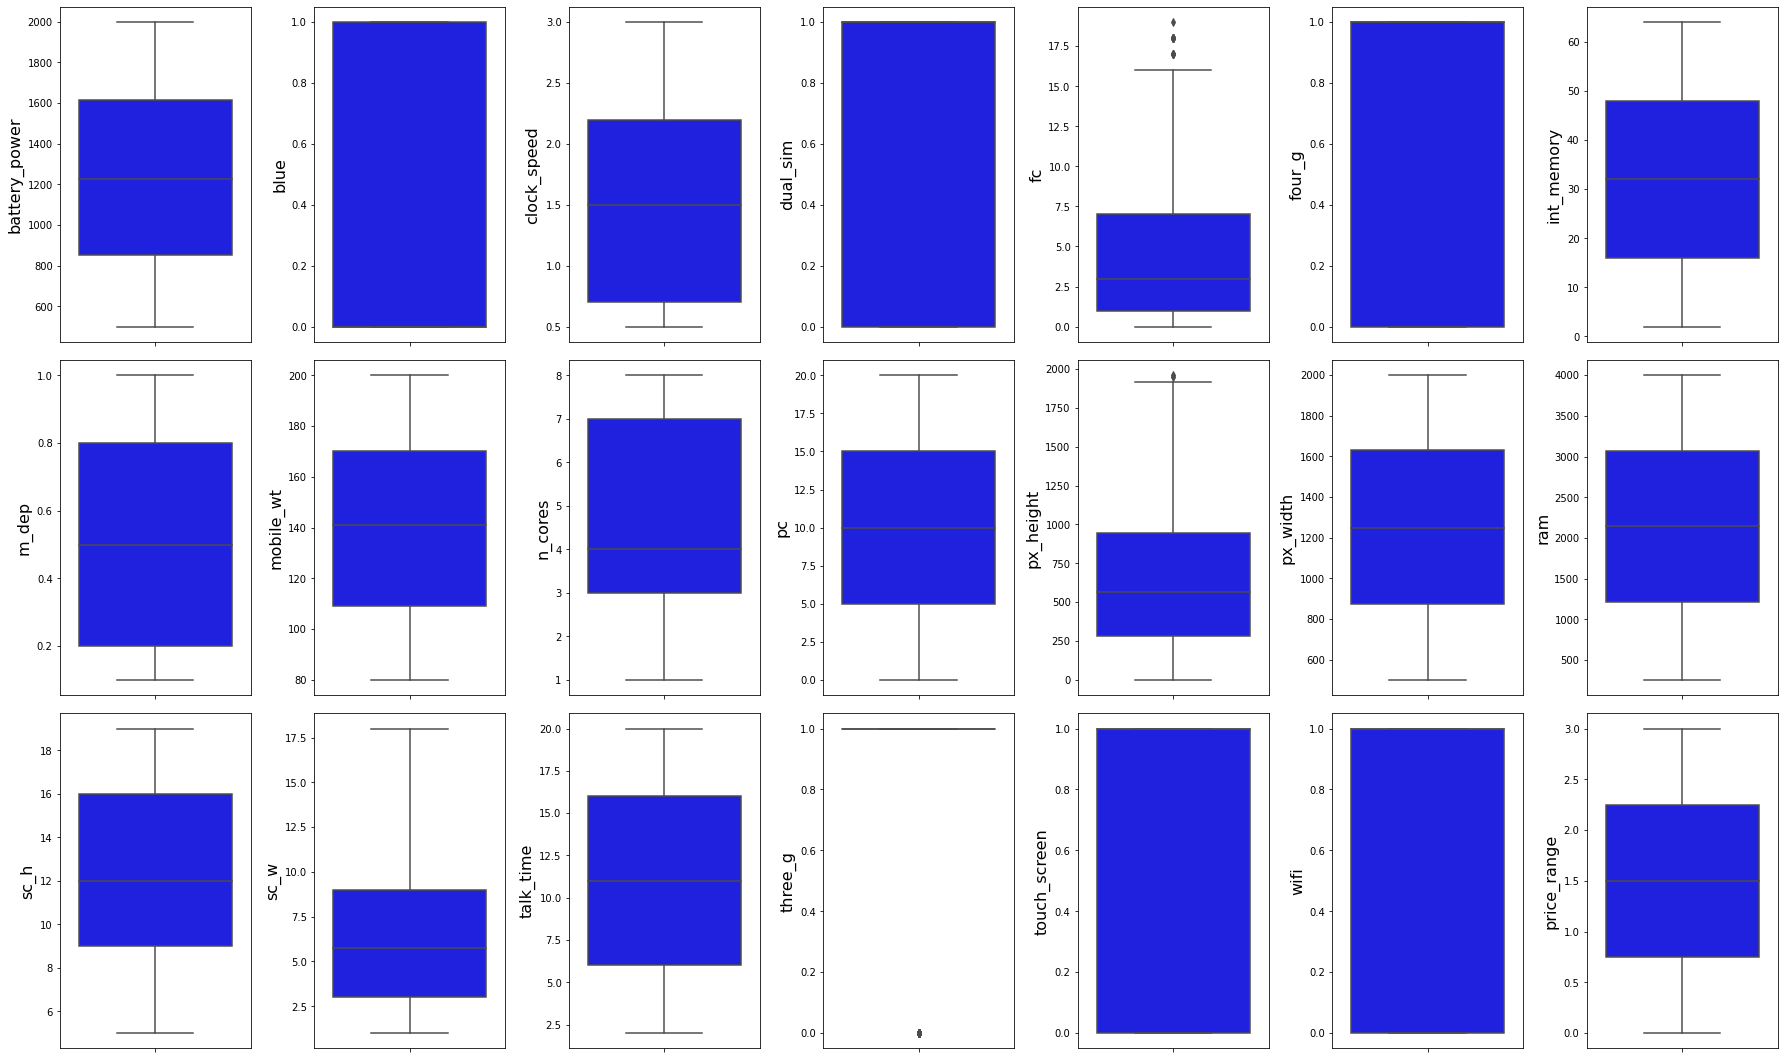

In [ ]:
i, j = 0, 0
Plots_per_row = 7
fig, axs = plt.subplots(math.ceil(len(data.columns)/Plots_per_row), Plots_per_row, figsize = (25,15))

for col in data.columns:
  plt.tight_layout()
  p = sns.boxplot(y=data[col], ax = axs[i,j], color='blue')
  p.set_ylabel(col, fontsize = 16)
  j+=1
  if j % Plots_per_row == 0:
    i+=1
    j=0
plt.show()



No extreme outliers were detected

**Point plots of all features on 'Price Range'**

IndexError: ignored

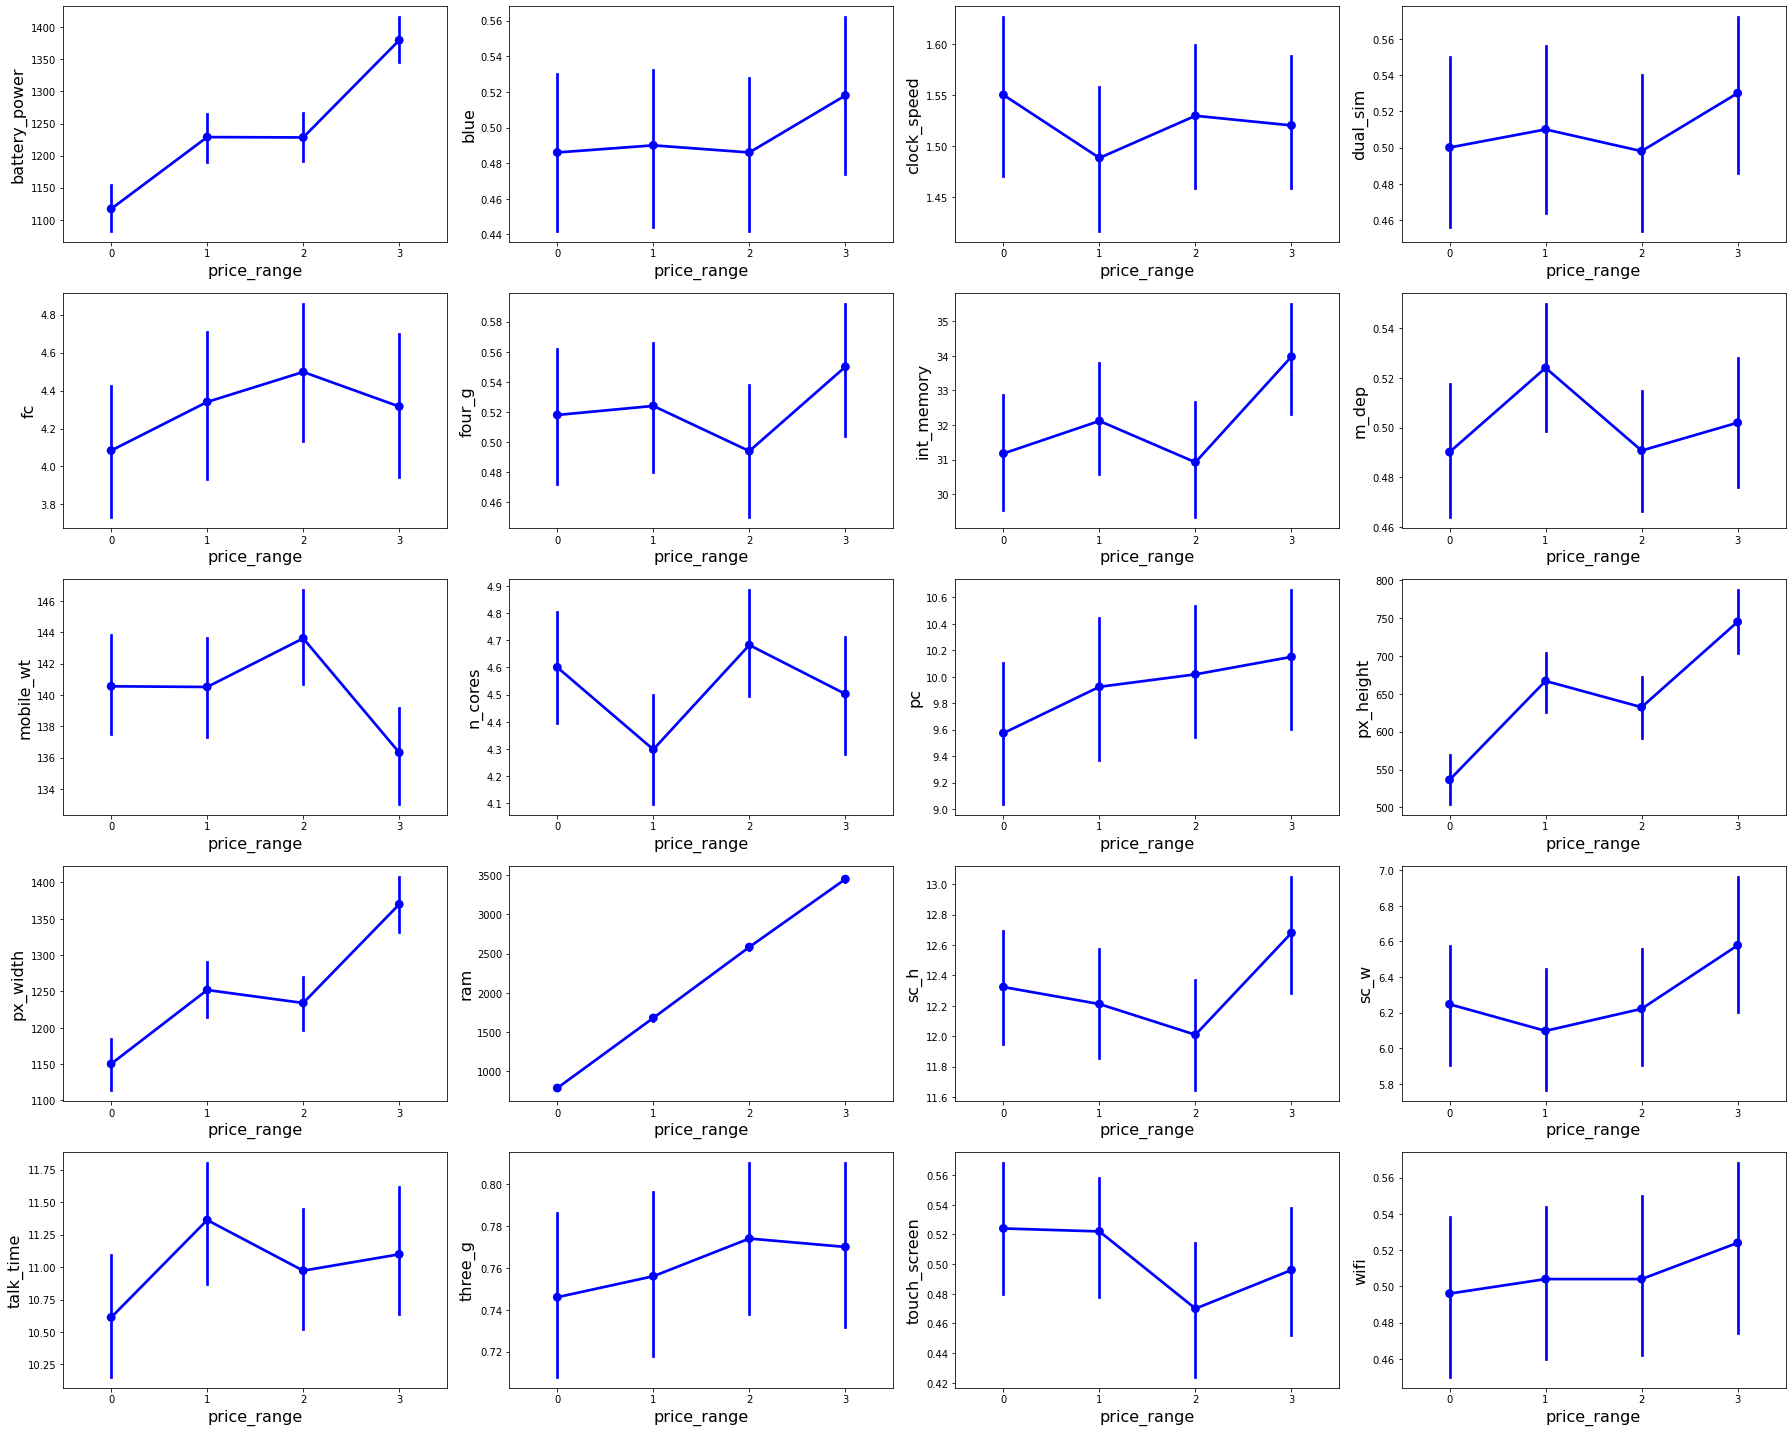

In [ ]:
i, j = 0, 0
plots_per_row = 4
fig, axs = plt.subplots(math.ceil((len(data.columns)-1)/plots_per_row), plots_per_row, figsize = (25,20))

for col in data.columns:
  if col == 'price-range':
    continue
  else:
    plt.tight_layout()
    n = sns.pointplot(data=data, x='price_range', y=data[col], ax=axs[i,j], color='blue')
    n.set_ylabel(col, fontsize=16)
    n.set_xlabel('price_range', fontsize=16)
    j+=1
    if j% plots_per_row == 0:
      i+=1
      j=0
plt.show() 



**Bar plots of all columns except univariate columns and price range**

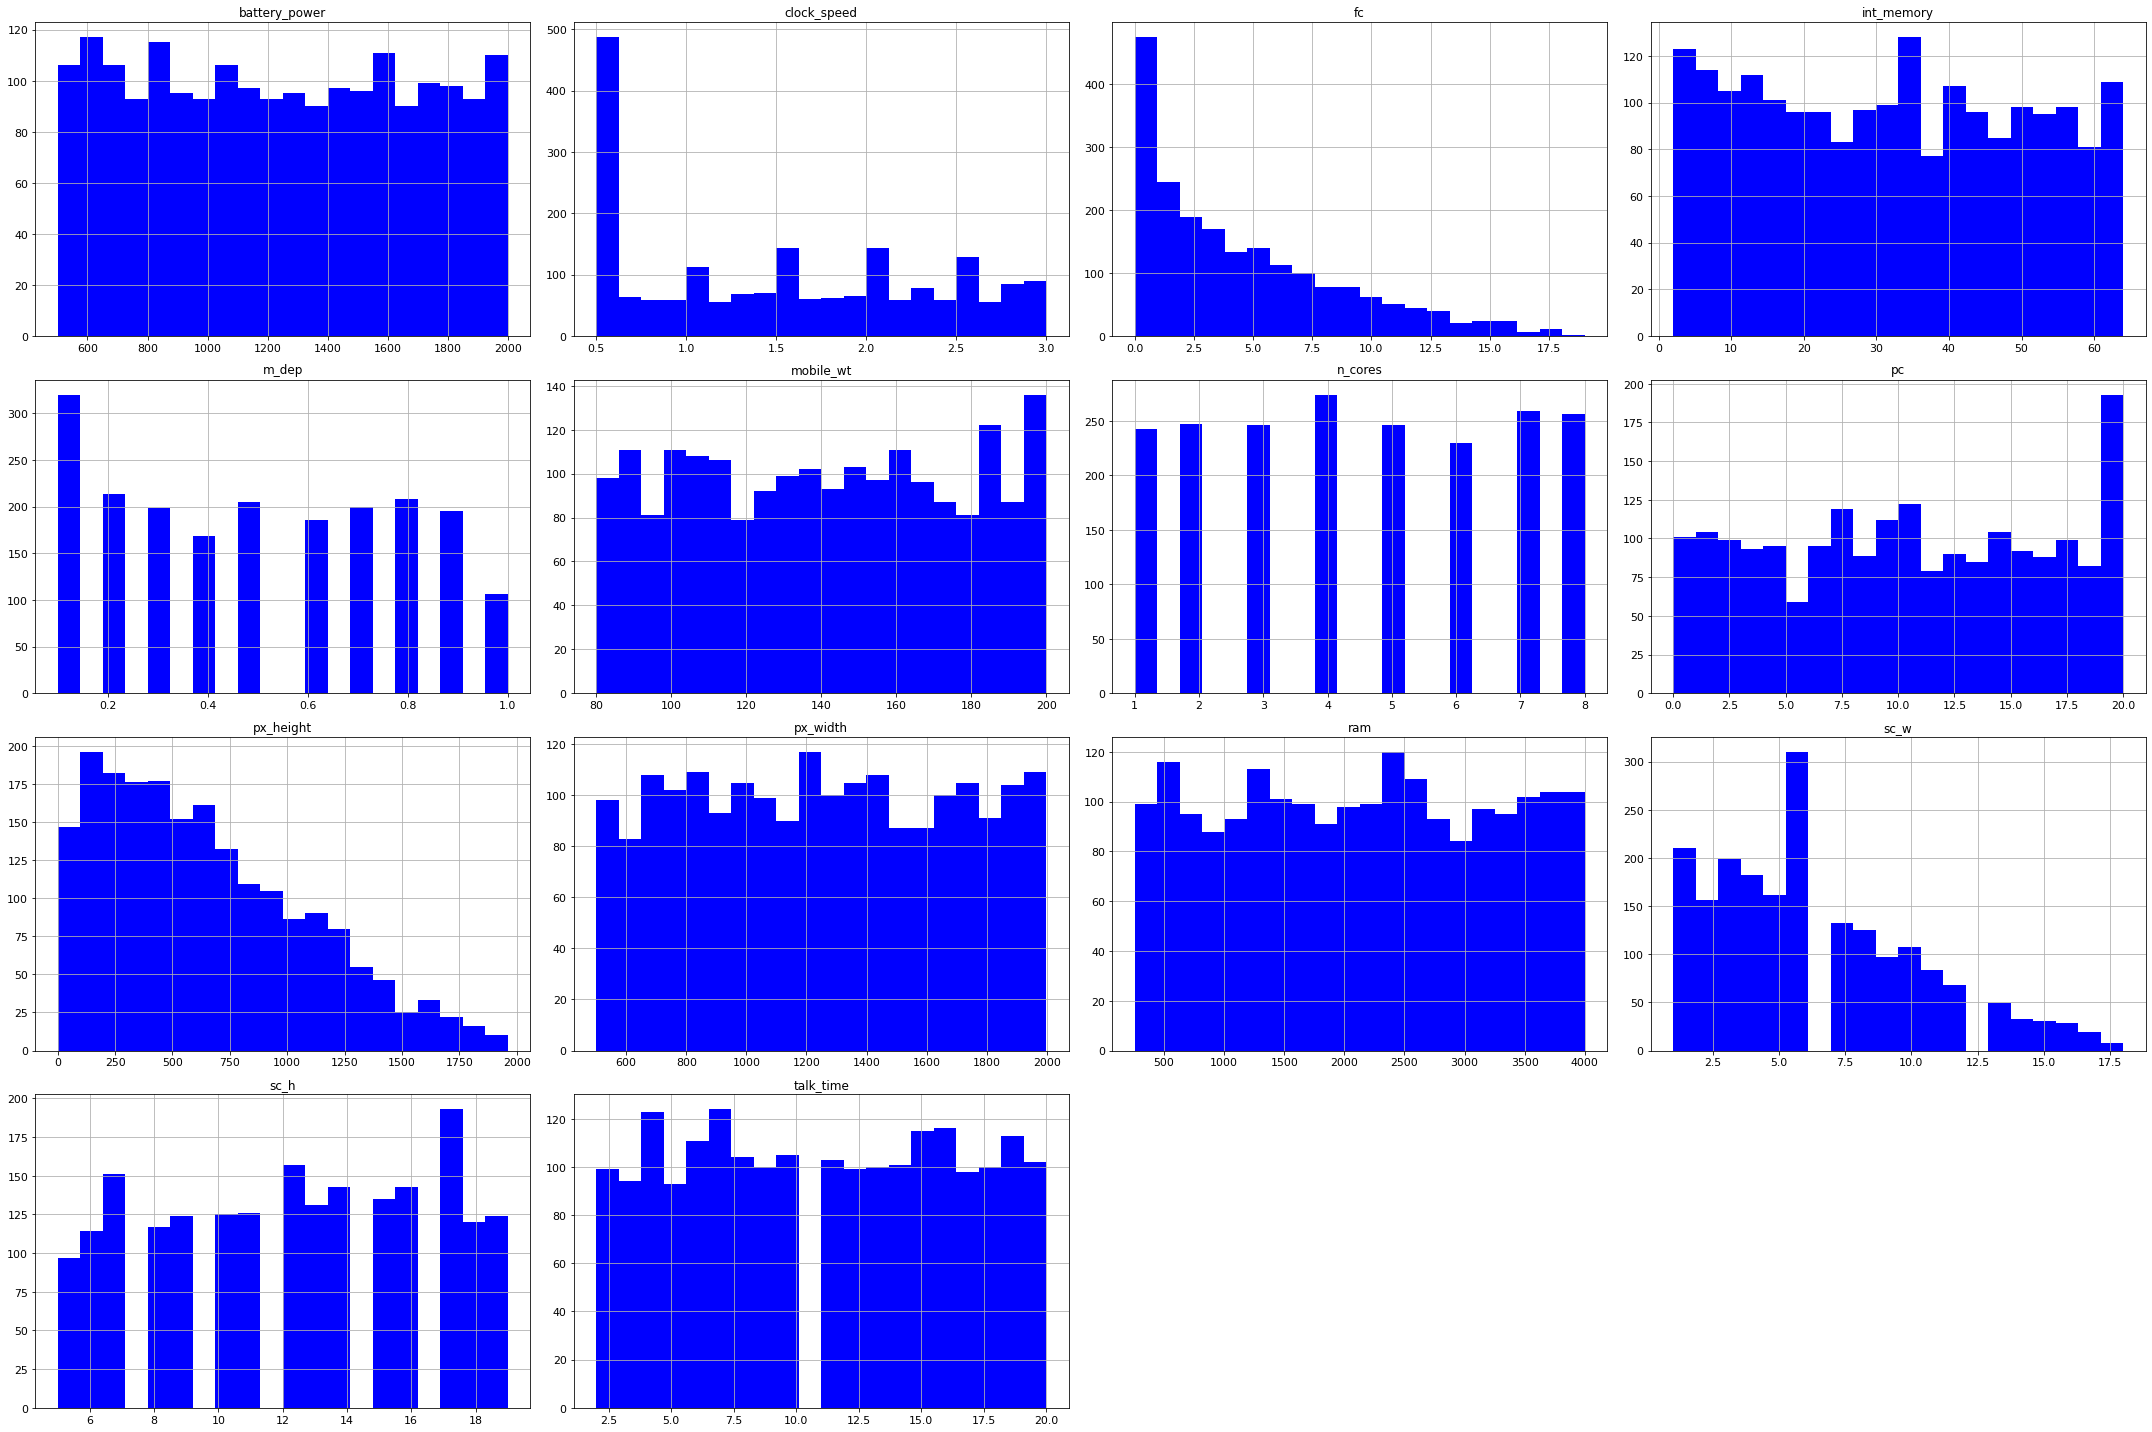

In [ ]:
col = ['battery_power', 'clock_speed', 'fc', 'int_memory', 'm_dep', 'mobile_wt', 'n_cores', 'pc', 'px_height', 'px_width', 'ram', 'sc_w', 'sc_h', 'talk_time']
data.hist(bins=20, figsize=(30,20), color='blue', column=col, xlabelsize=11, ylabelsize=11)
plt.tight_layout()
plt.show()

**Pie Plot for univariate analysis**

In [ ]:
plt.figure(figsize=(12,10))

rows=2
columns=3
count=1
univariate_features = ['blue', 'dual_sim', 'four_g', 'three_g', 'touch_screen', 'wifi']
labels=['Yes', 'No']
for var in univariate_features:
  plt.subplot(rows, columns, count)
  data[var].value_counts().plot.pie(autopct=)